<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    24.767994  31.185492  20.784129  0.464271   87.201886   
      1.0    74.907063  79.029271  67.977870 -1.328277  230.585926   
      2.0    27.129189  43.359219  85.352320  0.296630  166.137358   
      3.0    77.659046  51.885681  28.366975 -1.111564  166.800139   
      4.0    27.651915  91.679287  92.014349  0.637027  221.982578   
...                ...        ...        ...       ...         ...   
999.0 25.0   42.469248  28.265622  37.635560 -0.668173  117.702257   
      26.0   90.955938  37.827941  64.491238 -1.788002  201.487115   
      27.0   37.346002  71.405708  61.226719  0.985043  180.963472   
      28.0   86.769203  40.527873  60.374476 -1.073840  196.597711   
      29.0   23.435685  96.033854  23.894682 -0.374788  152.989434   

                  y_hat     e_hat  
rep   index                        
0.0   0.0     86.206844  0.995042  
      1.0    232.050244 -1.464317  
      2.0    166.087973  0.049386  
      3.0    167.226483 -0.426345  
      4.0    222.389773 -0.407195  
...                 ...       ...  
999.0 25.0   118.440149 -0.737892  
      26.0   203.053259 -1.566144  
      27.0   180.088958  0.874514  
      28.0   197.467855 -0.870144  
      29.0   153.472613 -0.483179  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    24.767994  31.185492  20.784129  0.464271   87.201886   
      1.0    74.907063  79.029271  67.977870 -1.328277  230.585926   
      2.0    27.129189  43.359219  85.352320  0.296630  166.137358   
      3.0    77.659046  51.885681  28.366975 -1.111564  166.800139   
      4.0    27.651915  91.679287  92.014349  0.637027  221.982578   
...                ...        ...        ...       ...         ...   
999.0 25.0   42.469248  28.265622  37.635560 -0.668173  117.702257   
      26.0   90.955938  37.827941  64.491238 -1.788002  201.487115   
      27.0   37.346002  71.405708  61.226719  0.985043  180.963472   
      28.0   86.769203  40.527873  60.374476 -1.073840  196.597711   
      29.0   23.435685  96.033854  23.894682 -0.374788  152.989434   

                  y_hat     e_hat  
rep   index                        
0.0   0.0     86.206844  0.995042  
      1.0    232.050244 -1.464317  
      2.0    166.087973  0.049386  
      3.0    167.226483 -0.426345  
      4.0    222.389773 -0.407195  
...                 ...       ...  
999.0 25.0   118.440149 -0.737892  
      26.0   203.053259 -1.566144  
      27.0   180.088958  0.874514  
      28.0   197.467855 -0.870144  
      29.0   153.472613 -0.483179  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,24.767994,31.185492,20.784129,0.464271,87.201886,86.206844,0.995042
1,0.0,1.0,74.907063,79.029271,67.977870,-1.328277,230.585926,232.050244,-1.464317
2,0.0,2.0,27.129189,43.359219,85.352320,0.296630,166.137358,166.087973,0.049386
3,0.0,3.0,77.659046,51.885681,28.366975,-1.111564,166.800139,167.226483,-0.426345
4,0.0,4.0,27.651915,91.679287,92.014349,0.637027,221.982578,222.389773,-0.407195
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,42.469248,28.265622,37.635560,-0.668173,117.702257,118.440149,-0.737892
29996,999.0,26.0,90.955938,37.827941,64.491238,-1.788002,201.487115,203.053259,-1.566144
29997,999.0,27.0,37.346002,71.405708,61.226719,0.985043,180.963472,180.088958,0.874514
29998,999.0,28.0,86.769203,40.527873,60.374476,-1.073840,196.597711,197.467855,-0.870144


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    24.767994  31.185492  20.784129  0.464271   87.201886   
      1.0    74.907063  79.029271  67.977870 -1.328277  230.585926   
      2.0    27.129189  43.359219  85.352320  0.296630  166.137358   
      3.0    77.659046  51.885681  28.366975 -1.111564  166.800139   
      4.0    27.651915  91.679287  92.014349  0.637027  221.982578   
...                ...        ...        ...       ...         ...   
999.0 25.0   42.469248  28.265622  37.635560 -0.668173  117.702257   
      26.0   90.955938  37.827941  64.491238 -1.788002  201.487115   
      27.0   37.346002  71.405708  61.226719  0.985043  180.963472   
      28.0   86.769203  40.527873  60.374476 -1.073840  196.597711   
      29.0   23.435685  96.033854  23.894682 -0.374788  152.989434   

                  y_hat     e_hat  
rep   index                        
0.0   0.0     86.206844  0.995042  
      1.0    232.050244 -1.464317  
      2.0    166.087973  0.049386  
      3.0    167.226483 -0.426345  
      4.0    222.389773 -0.407195  
...                 ...       ...  
999.0 25.0   118.440149 -0.737892  
      26.0   203.053259 -1.566144  
      27.0   180.088958  0.874514  
      28.0   197.467855 -0.870144  
      29.0   153.472613 -0.483179  

[30000 rows x 7 columns]

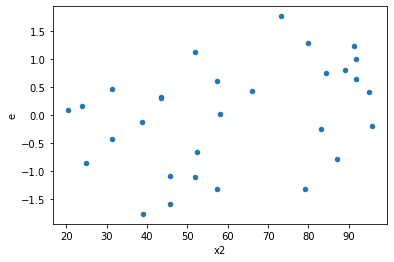

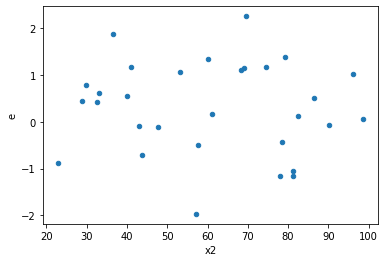

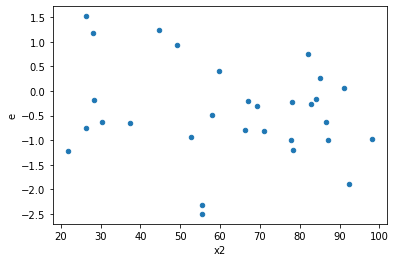

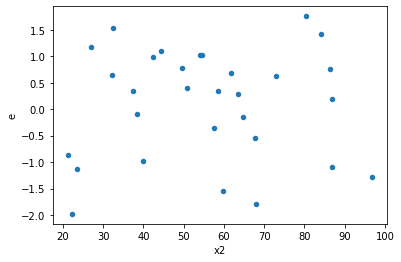

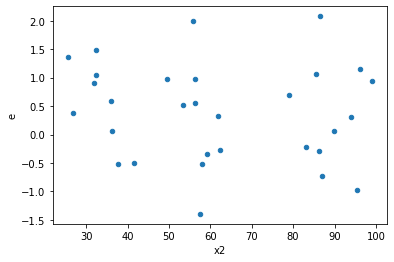

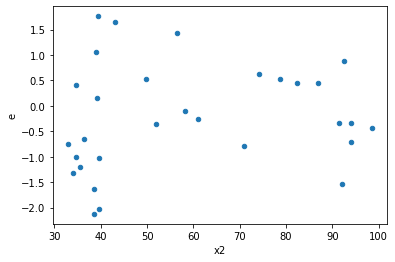

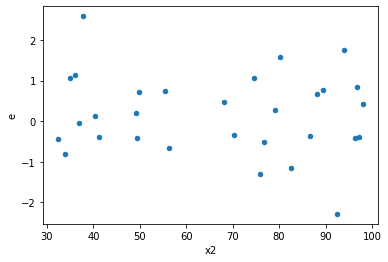

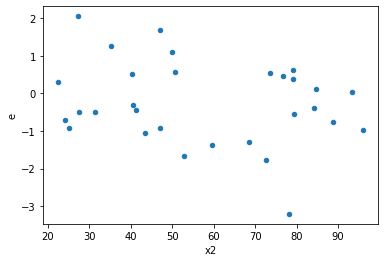

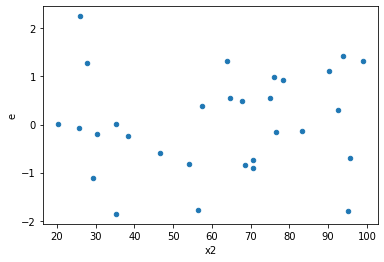

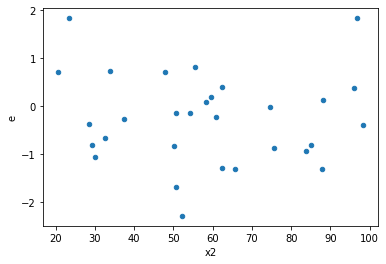

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,2.8815766683241333,8.567662668117189,0.32017518536934814,0.9519625186796876,2.973255149619173,0.1201921791961511,0.9399039104019244,0.06009608959807555,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,5.483779565922687,10.311312336542809,0.6093088406580763,1.1457013707269788,1.8803294721435166,0.36071358171847145,0.8196432091407643,0.18035679085923573,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,5.472130883099309,8.819302889869373,0.6080145425665899,0.9799225433188192,1.6116761602153584,0.48820242584309304,0.7558987870784535,0.24410121292154652,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,2.873770518884252,9.597086791781624,0.31930783543158353,1.0663429768646249,3.3395452868337294,0.08700852791540759,0.9564957360422962,0.04350426395770379,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,11.101108624928303,12.297846034966838,1.2334565138809226,1.3664273372185376,1.1078034140978659,0.8812866193945963,0.5593566903027019,0.44064330969729815,Reject001=1 : Homoscedasticity
10.0,9.0,9.0,9.750144219335706,14.227335101153823,1.0833493577039672,1.5808150112393138,1.459192272555242,0.5824925669254235,0.7087537165372882,0.29124628346271175,Reject001=1 : Homoscedasticity
11.0,9.0,9.0,5.087393627668611,10.158033985442279,0.5652659586298456,1.1286704428269199,1.9967069051225312,0.3176079147212698,0.8411960426393651,0.1588039573606349,Reject001=1 : Homoscedasticity
12.0,9.0,9.0,5.921256660089324,10.394916355606911,0.6579174066765916,1.1549907061785456,1.7555253812372489,0.4145547902694444,0.7927226048652778,0.2072773951347222,Reject001=1 : Homoscedasticity
14.0,9.0,9.0,4.411030853711118,12.351121888862297,0.49011453930123533,1.3723468765402551,2.8000533885341037,0.14107401902927497,0.9294629904853625,0.07053700951463748,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,2.8815766683241333,8.567662668117189,0.32017518536934814,0.9519625186796876,2.973255149619173,0.1201921791961511,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,5.483779565922687,10.311312336542809,0.6093088406580763,1.1457013707269788,1.8803294721435166,0.36071358171847145,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,8.381433980325156,7.659362000102986,0.9312704422583507,0.851040222233665,0.9138486347423144,0.8954436819963731,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,5.472130883099309,8.819302889869373,0.6080145425665899,0.9799225433188192,1.6116761602153584,0.48820242584309304,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,2.873770518884252,9.597086791781624,0.31930783543158353,1.0663429768646249,3.3395452868337294,0.08700852791540759,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,12.156544929404586,8.38489462232212,1.3507272143782874,0.9316549580357911,0.6897432346949589,0.5889072540302781,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,8.827400810286779,8.070312953011378,0.9808223122540866,0.8967014392234864,0.9142343399210843,0.8959304657074791,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,11.101108624928303,12.297846034966838,1.2334565138809226,1.3664273372185376,1.1078034140978659,0.8812866193945963,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,11.984219195186945,3.964023368175566,1.3315799105763273,0.44044704090839626,0.3307702657647969,0.11486589725519492,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      991
Reject001=0 : Heteroscedasticity      9
Name: Result_test, dtype: int64